## Smart Data (81532) - Zwischenbreicht
**Gruppe 6** - PCA der Inzidenz-Zeitreihen nach Ländern, Altersgruppen, Landkreisen

**Teilnehmer**: 
- Karolina Reimer 
- Fabian Nischalke
- Marvin Moik
- Finn Langpape
- Jan Lennard Klein
- Christian Giessel
- Ivan Duvnjak
- Malte Buchmüller

In [464]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as md
from datetime import timedelta

In [478]:
data = pd.read_csv("https://opendata.arcgis.com/api/v3/datasets/dd4580c810204019a7b8eb3e0b329dd6_0/downloads/data?format=csv&spatialRefId=4326")


In [471]:
data.head()

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
0,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,1,2020/09/30 00:00:00+00,1001,"30.11.2021, 00:00 Uhr",0,-9,2020/09/30 00:00:00+00,0,1,0,Nicht übermittelt
1,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2,2020/10/29 00:00:00+00,1001,"30.11.2021, 00:00 Uhr",0,-9,2020/10/29 00:00:00+00,0,1,0,Nicht übermittelt
2,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,3,2020/11/03 00:00:00+00,1001,"30.11.2021, 00:00 Uhr",0,-9,2020/11/03 00:00:00+00,0,1,0,Nicht übermittelt
3,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,4,2020/11/20 00:00:00+00,1001,"30.11.2021, 00:00 Uhr",0,-9,2020/11/19 00:00:00+00,0,1,1,Nicht übermittelt
4,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,5,2020/11/23 00:00:00+00,1001,"30.11.2021, 00:00 Uhr",0,-9,2020/11/18 00:00:00+00,0,1,1,Nicht übermittelt


#### Umwandeln der Datumsformate

In [472]:
data["Datenstand"] = pd.to_datetime(data.Datenstand, format='%d.%m.%Y', exact=False)

data["Meldedatum"] = pd.to_datetime(data.Meldedatum).dt.tz_localize(None)

data["Refdatum"] = pd.to_datetime(data.Refdatum).dt.tz_localize(None)

data[["Refdatum","Meldedatum","Datenstand"]]

,Refdatum,Meldedatum,Datenstand
0,2020-09-30,2020-09-30,2021-11-30
1,2020-10-29,2020-10-29,2021-11-30
2,2020-11-03,2020-11-03,2021-11-30
3,2020-11-19,2020-11-20,2021-11-30
4,2020-11-18,2020-11-23,2021-11-30
...,...,...,...
2265495,2021-10-19,2021-10-23,2021-12-01
2265496,2021-10-23,2021-10-23,2021-12-01
2265497,2021-10-17,2021-10-24,2021-12-01
2265498,2021-10-20,2021-10-24,2021-12-01


#### 1. Gesamtzahl Infizierte

In [473]:
data[ (data["NeuerFall"] == 1) | (data["NeuerFall"] == 0)]["AnzahlFall"].sum()

4458001

#### 2. Gesamtzahl Todesfälle

In [474]:
data[ (data["NeuerTodesfall"] == 1) | (data["NeuerTodesfall"] == 0)]["AnzahlTodesfall"].sum()

77600

#### 3. Zahl der Infizierten nach Altersgruppen und Geschlecht

<AxesSubplot:title={'center':' Zahl der Infizierten nach Altersgruppen und Geschlecht'}, xlabel='Altersgruppe', ylabel='Anzahl Fälle'>

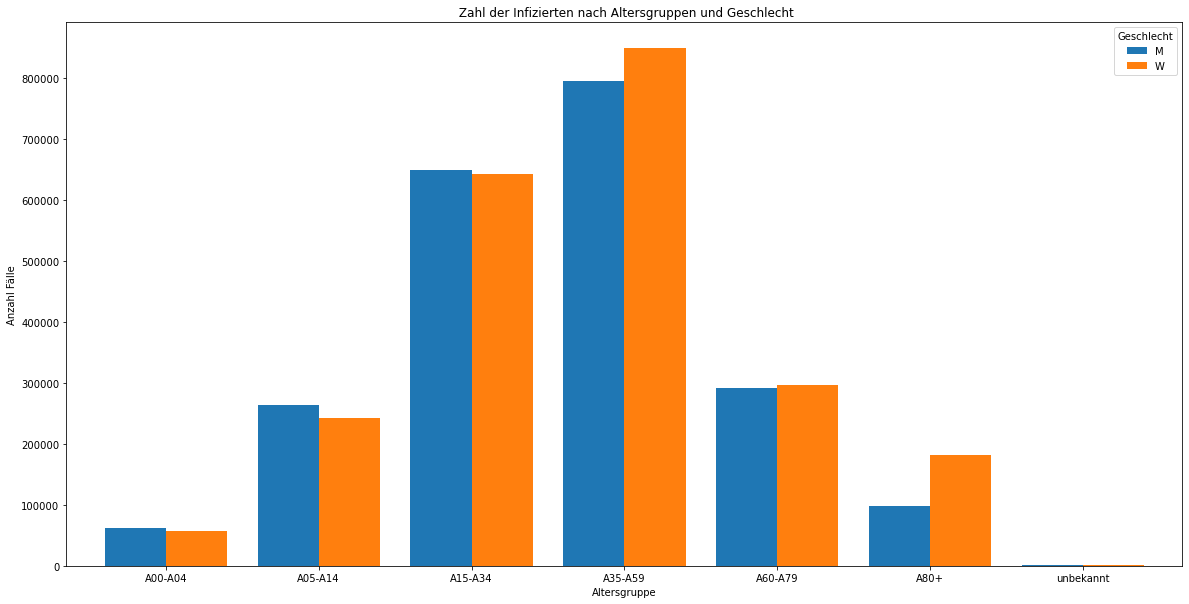

In [475]:
data_geschl = data[(data.Geschlecht == "M") | (data.Geschlecht == "W")]

data_fil_inf = pd.DataFrame((data_geschl.groupby(["Altersgruppe", "Geschlecht"])["AnzahlFall"].sum())) 
data_fil_inf.pivot_table(index='Altersgruppe', columns='Geschlecht').plot(kind = 'bar', 
                                                                      y = 'AnzahlFall', 
                                                                      figsize = [20,10], 
                                                                      width = 0.8,
                                                                      ylabel = "Anzahl Fälle",
                                                                      title = " Zahl der Infizierten nach Altersgruppen und Geschlecht", 
                                                                      rot=0
                                                                      )


In [476]:
data_geschl = data[(data.Geschlecht == "M") | (data.Geschlecht == "W")]

#### 4. Zahl der Toten nach Altersgruppe und Geschlecht

## data_fil_tod = pd.DataFrame((data_geschl.groupby(["Altersgruppe", "Geschlecht"])["AnzahlTodesfall"].sum())) 
data_fil_tod.pivot_table(index='Altersgruppe', columns='Geschlecht').plot(kind = 'bar', 
                                                                      y = 'AnzahlTodesfall', 
                                                                      figsize = [20,10], 
                                                                      width = 0.8,
                                                                      ylabel = "Anzahl Todesfälle",
                                                                      title = " Zahl der Infizierten nach Altersgruppen und Geschlecht", 
                                                                      rot=0
                                                                      )


#### 5. Verhältnis Zahl der Verstorbenen zur Zahl der Infizierten nach Altersgruppen und Geschlecht 

<AxesSubplot:title={'center':'Verhältnis Tode zu Fällen'}, xlabel='Altersgruppe'>

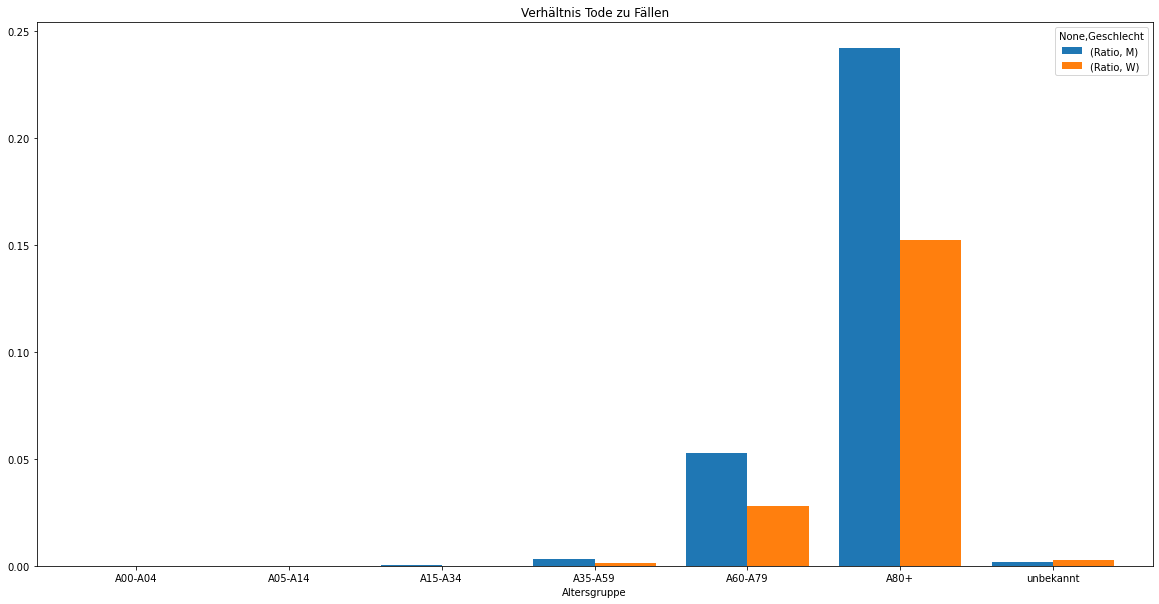

In [272]:
data_fil_rel = data_geschl.groupby(["Altersgruppe", "Geschlecht"])[["AnzahlTodesfall", "AnzahlFall"]].sum()
ratio = pd.DataFrame(data_fil_rel["AnzahlTodesfall"]/data_fil_rel["AnzahlFall"], columns=["Ratio"])
ratio.pivot_table(index="Altersgruppe", columns="Geschlecht").plot(kind = 'bar', 
                                                                   figsize = [20,10], 
                                                                   width = 0.8, 
                                                                   title = "Verhältnis Tode zu Fällen",
                                                                   rot = 0)

#### 6. Zeitverlauf der Zahl der Neuinfizierten 

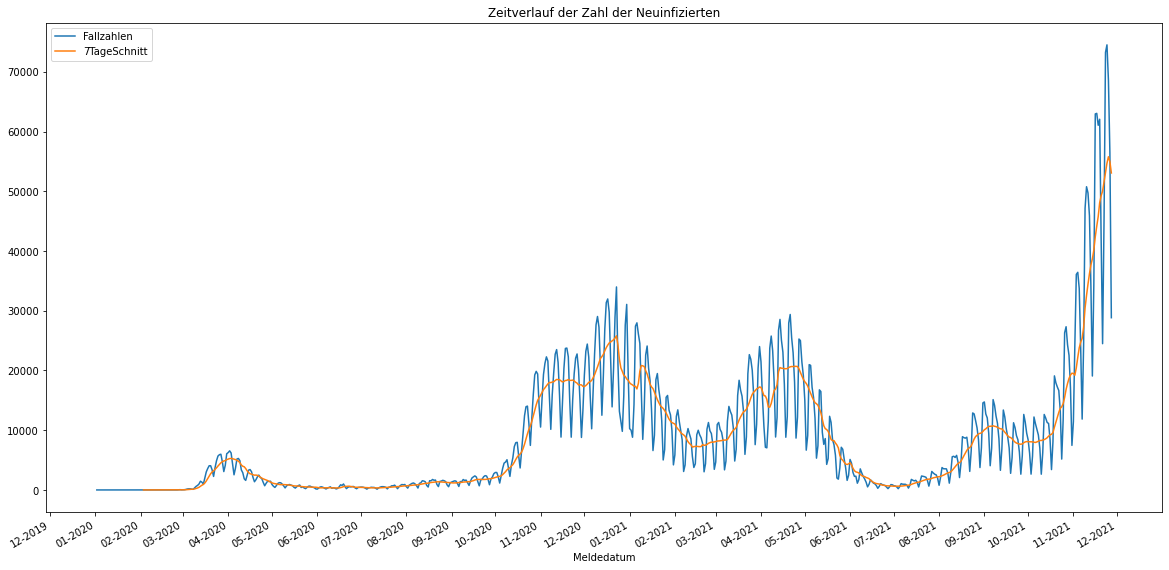

In [235]:
gefiltert_inf = data[(data.NeuerFall == 0) | (data.NeuerFall == 1)]

summe = gefiltert_inf.groupby("Meldedatum")["AnzahlFall"].sum()
schnitt = summe.rolling(7).mean()

ax = summe.plot(figsize=(20,10), title="Zeitverlauf der Zahl der Neuinfizierten")
schnitt.plot(ax=ax)

ax.legend(["Fallzahlen", "7TageSchnitt"])

#ax.set_axisbelow(True)
#ax.grid()
ax.xaxis.set_major_locator(md.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(md.DateFormatter("%m-%Y"))


#### 7. Zeitverlauf der Neu Verstorbenen

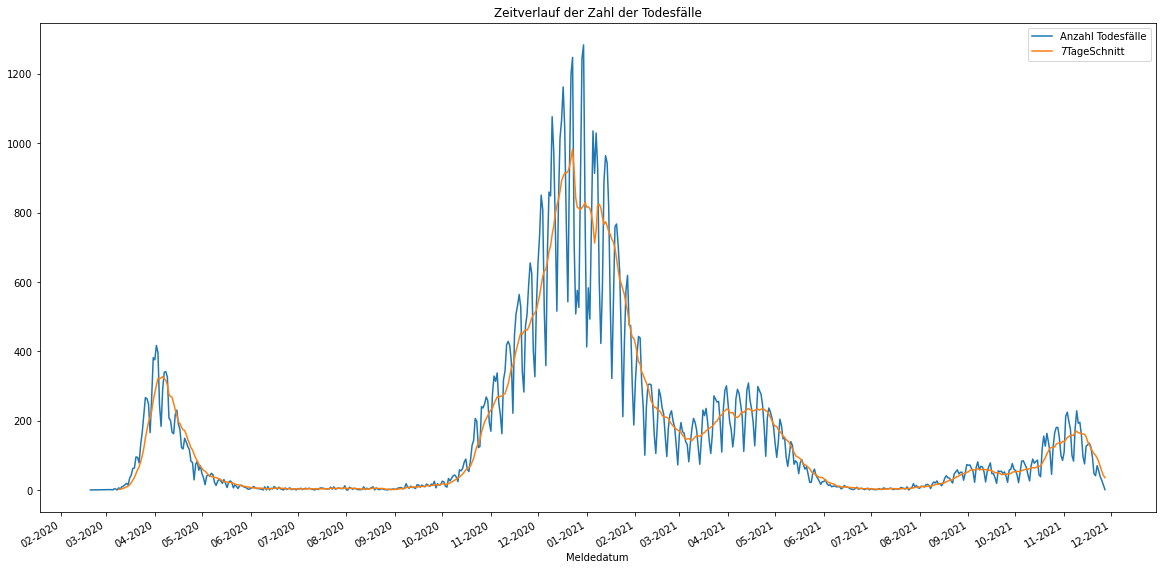

In [288]:
gefiltert_tod = data[(data["NeuerTodesfall"] == 0) | (data["NeuerTodesfall"] == 1)]
summe_tod = gefiltert_tod.groupby("Meldedatum")["AnzahlTodesfall"].sum()
schnitt_tod = summe_tod.rolling(7).mean()

ax_tod = summe_tod.plot(figsize=(20,10), title="Zeitverlauf der Zahl der Todesfälle")
schnitt_tod.plot(ax=ax_tod)

ax_tod.legend(["Anzahl Todesfälle", "7TageSchnitt"])

ax_tod.set_axisbelow(True)
#ax_tod.grid()
ax_tod.xaxis.set_major_locator(md.MonthLocator(interval=1))
ax_tod.xaxis.set_major_formatter(md.DateFormatter("%m-%Y"))

#### 7.1 Zeitverlauf der Gesamtzahl der Verstorbenen

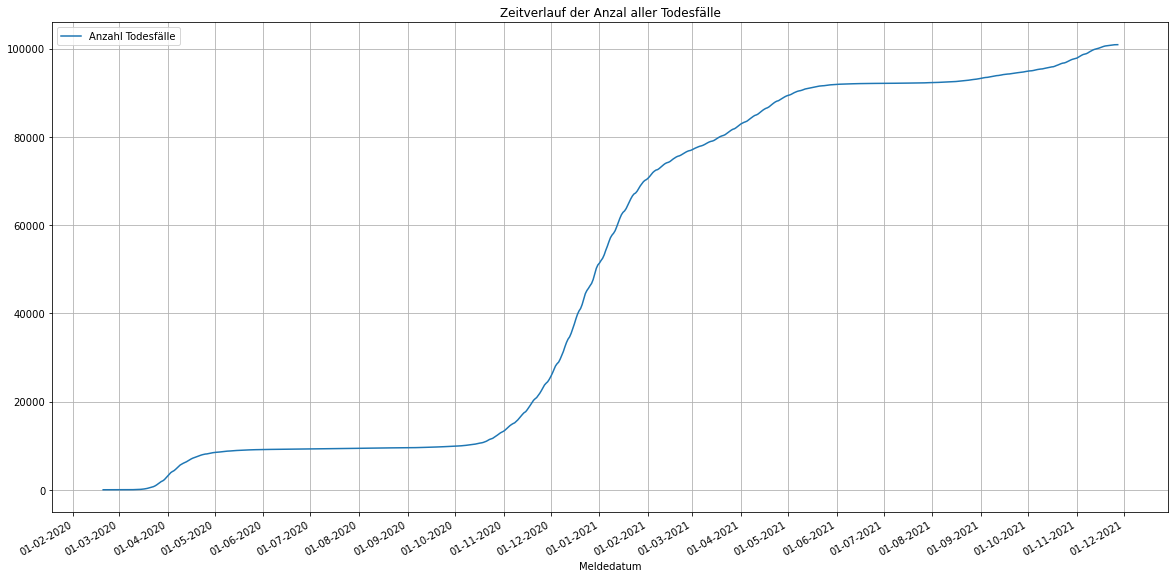

In [297]:
gefiltert_tod = data[(data["NeuerTodesfall"] == 0) | (data["NeuerTodesfall"] == 1)]
summe_tod = gefiltert_tod.groupby("Meldedatum")["AnzahlTodesfall"].sum()
#schnitt_tod = summe_tod.rolling(7).mean()

ax_tod = np.cumsum(summe_tod).plot(figsize=(20,10), title="Zeitverlauf der Anzal aller Todesfälle")
#schnitt_tod.plot(ax=ax_tod)

ax_tod.legend(["Anzahl Todesfälle"])

ax_tod.set_axisbelow(True)
ax_tod.grid()
ax_tod.xaxis.set_major_locator(md.MonthLocator(interval=1))
ax_tod.xaxis.set_major_formatter(md.DateFormatter("%d-%m-%Y"))

#### 8. "7-Tage Inzidenz" im Zeitverlauf

In [136]:
# Laden Der Bewohner Tabelle

einwohner = pd.read_csv("https://raw.githubusercontent.com/oliverhummel/rki_ds/main/einwohnerzahlen.csv", 
                        sep=";", decimal=",")

einwohner_de = einwohner[(einwohner.Bezeichnung == "Land")]["Bevölkerung"].sum()

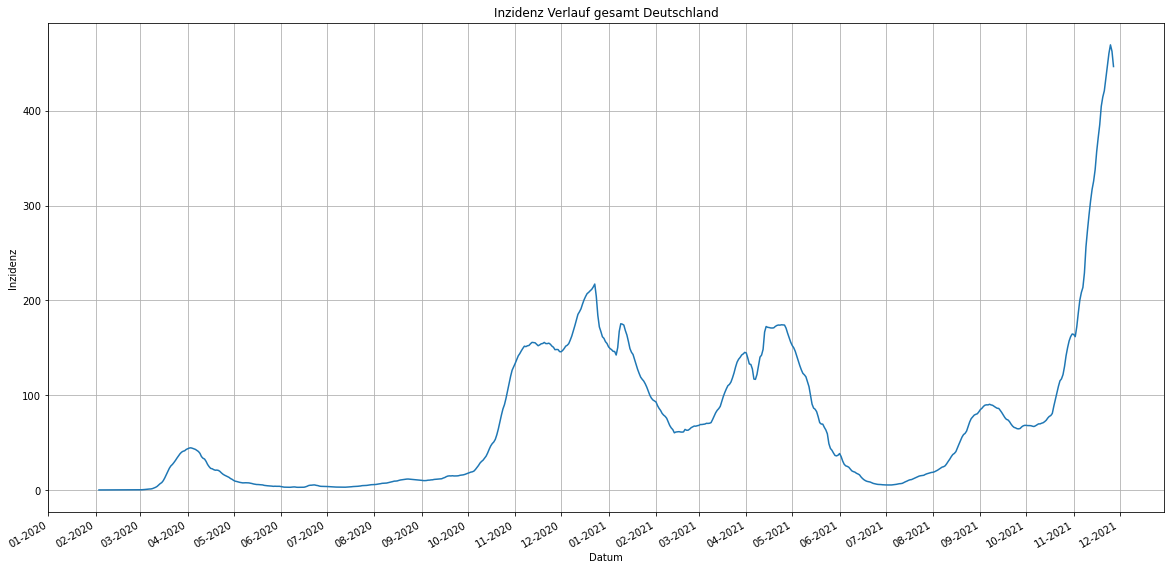

In [296]:
summe_inz = summe.rolling(7).sum()/einwohner_de*100000

ax = summe_inz.plot(figsize=[20,10], title="Inzidenz Verlauf gesamt Deutschland")
ax.set_xlabel("Datum")
ax.set_ylabel("Inzidenz")

ax.set_axisbelow(True)
#ax.grid()
ax.xaxis.set_major_locator(md.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(md.DateFormatter("%m-%Y"))

#### 9. "7-Tage Inzidenz" nach Altersgruppen im Zeitverlauf

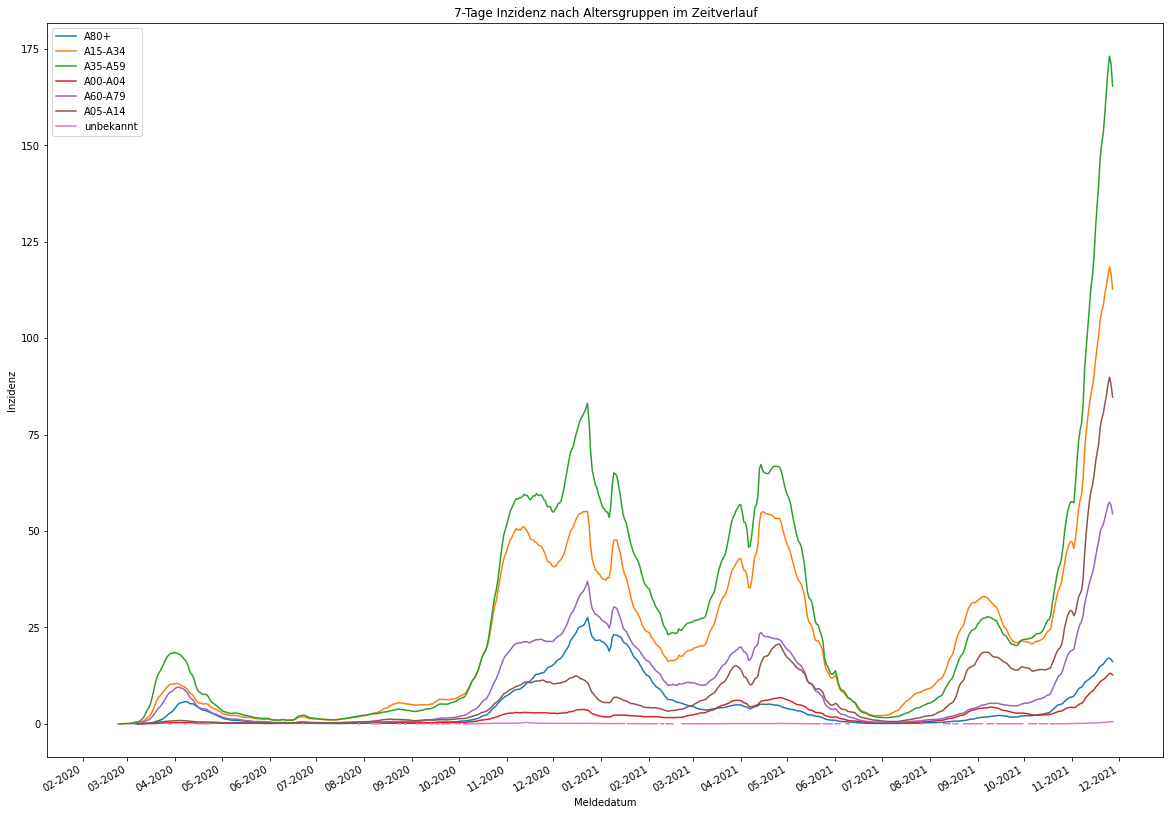

In [221]:
summe_inz_wm = pd.DataFrame(gefiltert_inf.groupby(["Meldedatum", "Altersgruppe"])
                            ["AnzahlFall"].sum()).reset_index(level=1)

altersgruppen = summe_inz_wm.Altersgruppe.unique()

inz_ag_sum_all = pd.DataFrame(index=summe_inz_wm.index)

for altersgruppe in altersgruppen:
    
    inz_ag_sum = summe_inz_wm[(summe_inz_wm.Altersgruppe == altersgruppe)].rolling(7).sum()/einwohner_de*100000
    inz_ag_sum_all = inz_ag_sum_all.join(inz_ag_sum, lsuffix="Meldedatum")

inz_ag_sum_all.columns = altersgruppen

ax = inz_ag_sum_all.plot(kind="line", 
                    figsize=[20,15],
                    title="7-Tage Inzidenz nach Altersgruppen im Zeitverlauf",
                    ylabel = "Inzidenz"
                    )

ax.set_axisbelow(True)
#ax.grid()
ax.xaxis.set_major_locator(md.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(md.DateFormatter("%m-%Y"))

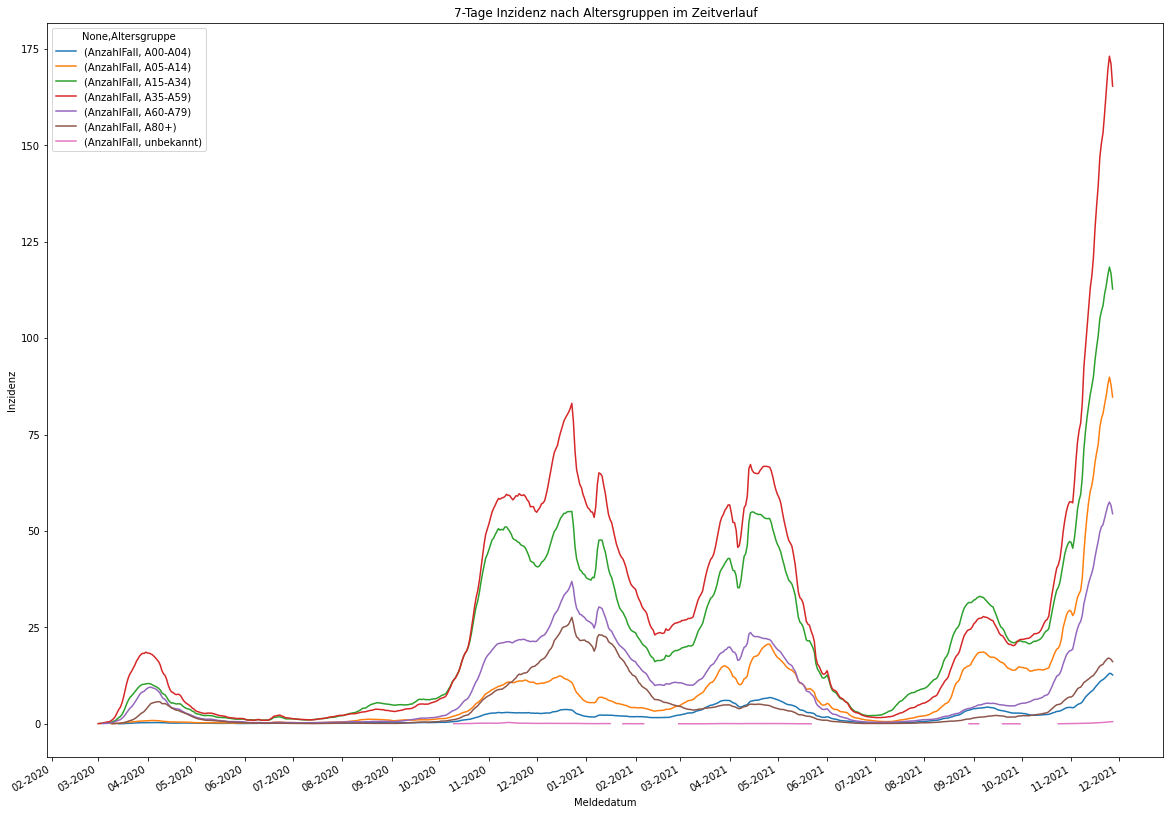

In [260]:
# mit pivot table 

summe_inz_wm = pd.DataFrame(gefiltert_inf.groupby(["Meldedatum", "Altersgruppe"])
                            ["AnzahlFall"].sum()).reset_index(level=1)

ax = (summe_inz_wm.pivot_table(index='Meldedatum', columns='Altersgruppe').rolling(7).sum()/einwohner_de*100000).plot(kind="line", 
                    figsize=[20,15],
                    title="7-Tage Inzidenz nach Altersgruppen im Zeitverlauf",
                    ylabel = "Inzidenz"
                    )

ax.set_axisbelow(True)
#ax.grid()
ax.xaxis.set_major_locator(md.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(md.DateFormatter("%m-%Y"))

In [448]:
summe_inz_wm.pivot_table(index='Meldedatum', columns='Altersgruppe').rolling(7).sum()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AnzahlFall                                                \
Altersgruppe    A00-A04  A05-A14  A15-A34   A35-A59  A60-A79     A80+   
Meldedatum                                                              
2020-01-02          NaN      NaN      NaN       NaN      NaN      NaN   
2020-01-23          NaN      NaN      NaN       NaN      NaN      NaN   
2020-01-28          NaN      NaN      NaN       NaN      NaN      NaN   
2020-01-29          NaN      NaN      NaN       NaN      NaN      NaN   
2020-01-31          NaN      NaN      NaN       NaN      NaN      NaN   
...                 ...      ...      ...       ...      ...      ...   
2021-11-23      10178.0  70767.0  94447.0  136253.0  45649.0  13781.0   
2021-11-24      10549.0  73106.0  96699.0  140872.0  47098.0  14157.0   
2021-11-25      10885.0  74735.0  98482.0  143939.0  47823.0  14139.0   
2021-11-26      10850.0  73137.0  97117.0  142280.0  47078.0  13889.0   
2021-11-27      10544.0  70449.0  93752.0  137482.0  45310.0  13417.0   

                        
Altersgruppe unbekannt  
Meldedatum              
2020-01-02         NaN  
2020-01-23         NaN  
2020-01-28         NaN  
2020-01-29         NaN  
2020-01-31         NaN  
...                ...  
2021-11-23       343.0  
2021-11-24       404.0  
2021-11-25       435.0  
2021-11-26       470.0  
2021-11-27       476.0  

[658 rows x 7 columns]

In [463]:
import warnings
warnings.filterwarnings("ignore")
import openpyxl

sba = pd.read_excel('SBA_BV.xlsx', engine='openpyxl')
sba.columns = sba.iloc[3]
Bevölkerung = sba[5:97]

Bevölkerung.columns[0]

nan